# Week3授業前課題2
## 住居情報の分析
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

[Ames, Iowa - Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)

# 問題1
## データセットの取得
`pd.read_csv()`を使用して、変数に格納してください。

In [1]:
import numpy as np
import pandas as pd
# 特徴量が多いため最大表示数制限を100に拡大
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

filename = 'train.csv'
df_prices = pd.read_csv(filename)

display(df_prices)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# 問題2
## データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

# 概要
アメリカ アイオワ州エイムズ市のさまざまな特徴量と価格が記録されたデータ。

部屋の数・広さなど、79種類の特徴量が含まれている。

# 問題3
## データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。


In [2]:
# 各特徴量がどういったものかを見る。（数値データか文字データなど）
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- 今回の目的変数はどの列か確認する。
> SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
`SalePrice`列が今回の目的変数。単位はドル。

In [3]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 問題4
## 欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。


In [4]:
# 各特徴量の欠損値の有無を確認する。
import missingno as msno

df_prices.isnull().sum().sort_values(ascending=False)

ModuleNotFoundError: No module named 'missingno'

In [5]:
# 欠損値が何パーセント含まれるかを確認する。
(df_prices.isnull().sum()/len(df_prices)).sort_values(ascending=False).map('{:.3%}'.format)

PoolQC           99.521%
MiscFeature      96.301%
Alley            93.767%
Fence            80.753%
FireplaceQu      47.260%
LotFrontage      17.740%
GarageCond        5.548%
GarageType        5.548%
GarageYrBlt       5.548%
GarageFinish      5.548%
GarageQual        5.548%
BsmtExposure      2.603%
BsmtFinType2      2.603%
BsmtFinType1      2.534%
BsmtCond          2.534%
BsmtQual          2.534%
MasVnrArea        0.548%
MasVnrType        0.548%
Electrical        0.068%
Utilities         0.000%
YearRemodAdd      0.000%
MSSubClass        0.000%
Foundation        0.000%
ExterCond         0.000%
ExterQual         0.000%
Exterior2nd       0.000%
Exterior1st       0.000%
RoofMatl          0.000%
RoofStyle         0.000%
YearBuilt         0.000%
LotConfig         0.000%
OverallCond       0.000%
OverallQual       0.000%
HouseStyle        0.000%
BldgType          0.000%
Condition2        0.000%
BsmtFinSF1        0.000%
MSZoning          0.000%
LotArea           0.000%
Street            0.000%


In [6]:
# 5つ以上欠損値がある特徴量（列）は削除する。

missing_col_num = df_prices.isnull().sum(axis=1)
display(missing_col_num.sort_values(ascending=False))

df_modified = df_prices[missing_col_num < 5]

display(df_modified)
df_modified.info()

df_modified.isnull().sum(axis=1).sort_values(ascending=False)
# 確かに欠損値の数は4列以下になっている

1011    15
533     15
1218    15
39      15
705     14
        ..
21       2
439      2
1210     2
1386     1
1328     1
Length: 1460, dtype: int64

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,Ga

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 1 to 1457
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             785 non-null    int64  
 1   MSSubClass     785 non-null    int64  
 2   MSZoning       785 non-null    object 
 3   LotFrontage    749 non-null    float64
 4   LotArea        785 non-null    int64  
 5   Street         785 non-null    object 
 6   Alley          78 non-null     object 
 7   LotShape       785 non-null    object 
 8   LandContour    785 non-null    object 
 9   Utilities      785 non-null    object 
 10  LotConfig      785 non-null    object 
 11  LandSlope      785 non-null    object 
 12  Neighborhood   785 non-null    object 
 13  Condition1     785 non-null    object 
 14  Condition2     785 non-null    object 
 15  BldgType       785 non-null    object 
 16  HouseStyle     785 non-null    object 
 17  OverallQual    785 non-null    int64  
 18  OverallCo

708     4
774     4
548     4
546     4
544     4
       ..
1083    2
1076    2
1457    2
1328    1
1386    1
Length: 785, dtype: int64

In [7]:
# 欠損値があるサンプル（行）は削除する。

df_fully = df_prices[missing_col_num == 0]

display(df_fully)
df_fully.info()
# すべての行に欠損値が少なくとも一つは存在しているため全行が削除された

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             0 non-null      int64  
 1   MSSubClass     0 non-null      int64  
 2   MSZoning       0 non-null      object 
 3   LotFrontage    0 non-null      float64
 4   LotArea        0 non-null      int64  
 5   Street         0 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       0 non-null      object 
 8   LandContour    0 non-null      object 
 9   Utilities      0 non-null      object 
 10  LotConfig      0 non-null      object 
 11  LandSlope      0 non-null      object 
 12  Neighborhood   0 non-null      object 
 13  Condition1     0 non-null      object 
 14  Condition2     0 non-null      object 
 15  BldgType       0 non-null      object 
 16  HouseStyle     0 non-null      object 
 17  OverallQual    0 non-null      int64  
 18  OverallCond    0 non-n

# 問題5
## 用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

# 尖度
データの分布がどれだけ尖っているかを示す統計量のこと。

正規分布に比べ、 **データが平均付近に集中** していれば正の値を、そうでなければ負の値を示す。

(正規分布の尖度=0とした場合。3とする場合もある。)

# 歪度
データの分布がどれほど歪んでいる（左右対称でない）かを示す統計量のこと。

単峰型の分布の場合、右に歪んでいれば正の値を、左に歪んでいれば負の値を示す。

# 問題6
## 分布の確認
- seabornの`sns.distplot()`を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

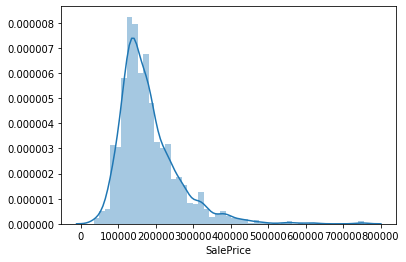

尖度: 6.536281860064529
歪度: 1.8828757597682129


In [8]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
import matplotlib.pyplot as plt
import seaborn as sns

response_var = df_prices['SalePrice']

fig = plt.figure()
ax = plt.subplot(111)

ax = sns.distplot(response_var)

plt.show()

print(f"尖度: {response_var.kurt()}")
print(f"歪度: {response_var.skew()}")

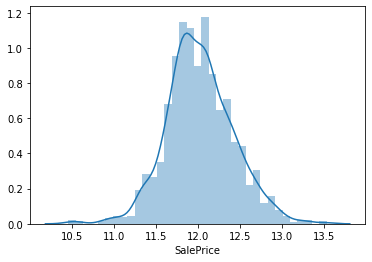

尖度(対数変換後): 0.8095319958036296
歪度(対数変換後): 0.12133506220520406


In [9]:
# 目的変数に対して対数変換を行う。
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

response_var_log = np.log(response_var)

fig = plt.figure()
ax = plt.subplot(111)

ax = sns.distplot(response_var_log)

plt.show()

print(f"尖度(対数変換後): {response_var_log.kurt()}")
print(f"歪度(対数変換後): {response_var_log.skew()}")

# 対数変換後の目的変数について
分布の形状が正規分布に近づいている。

実際、尖度・歪度についても0に近づいている。

# 問題7
## 相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


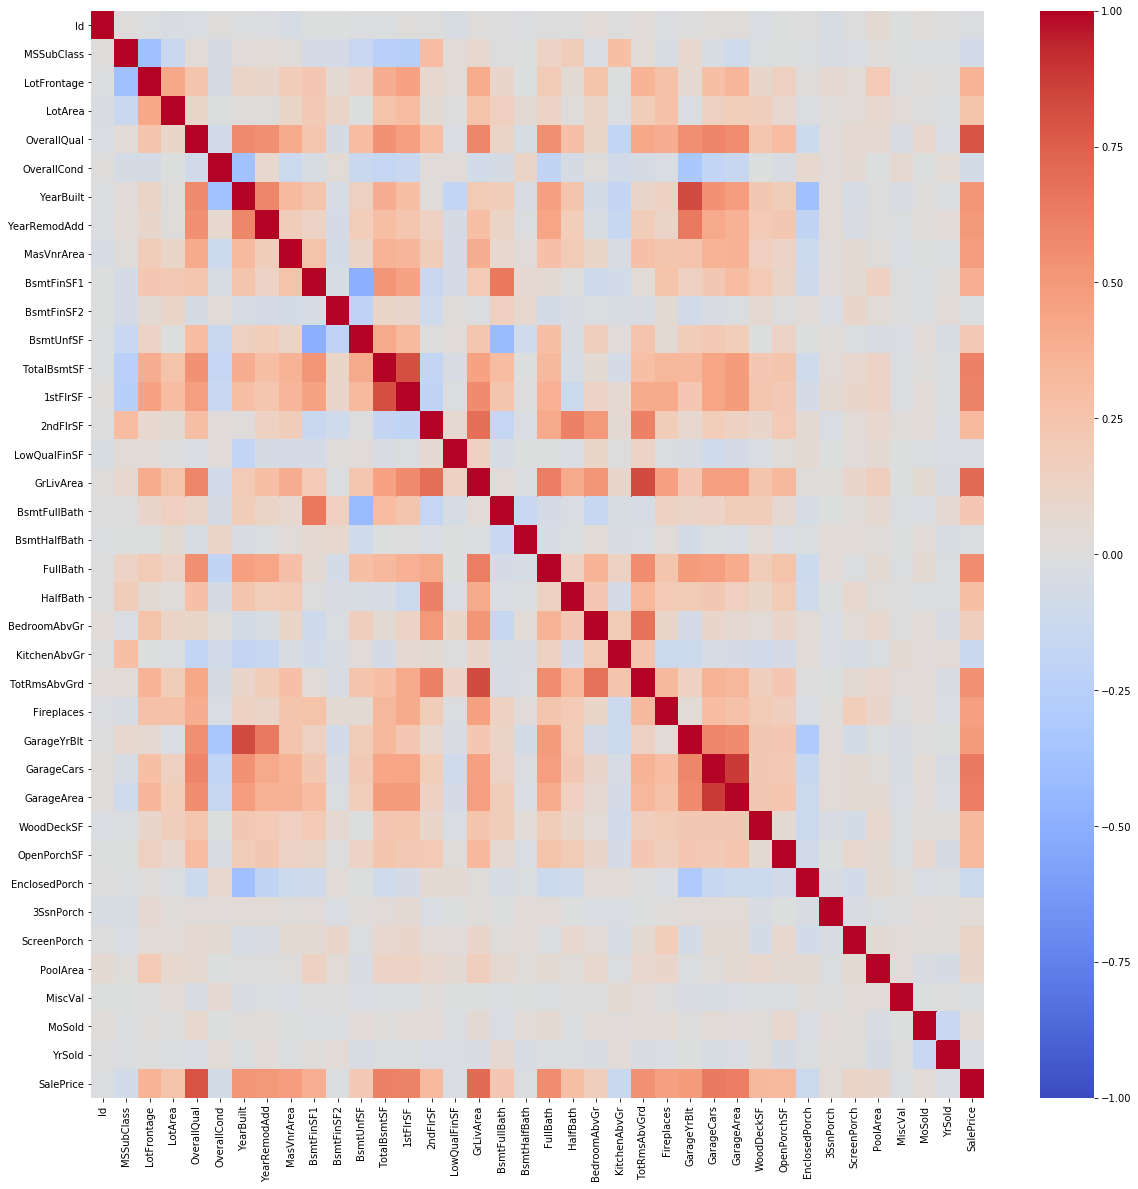

In [10]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

prices_corr = df_prices.corr()

fig = plt.figure(figsize=(20, 20))
ax = plt.subplot(111)
ax = sns.heatmap(prices_corr, vmin=-1, vmax=1, cmap='coolwarm')

plt.show()

# 相関係数の高い関係
ヒートマップから目視で確認・いくつかピックアップ
## 特徴量間
YearBuilt - GarageYrBlt

GrLivArea - TotRmsAbvGrd

GarageCars - GarageArea
## 特徴量-目的変数
OverakkQual - SalePrice

GrLivArea - SalePrice

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


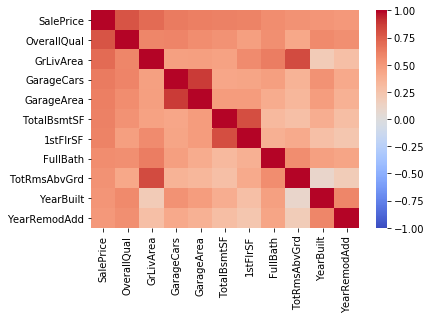

In [11]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

prices_corr_pick = prices_corr['SalePrice'].sort_values(ascending=False).iloc[:11]
display(prices_corr_pick)

# 目的変数と高い相関を持つ列10列と目的変数で構成されたDataFrameを作成
df_high = df_prices[prices_corr_pick.index]
display(df_high)

df_high_corr = df_high.corr()

fig = plt.figure()
ax = plt.subplot(111)

ax = sns.heatmap(df_high_corr, vmin=-1, vmax=1, cmap='coolwarm')

plt.show()

In [12]:
# 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

display(df_high_corr)

# 列名と相関係数をlistに格納する
prices_corr_list = []

import itertools
for col, index in itertools.combinations(df_high_corr.columns[1:], 2):
    prices_corr_list.append([col, index, df_high_corr.at[col, index]])

# 相関係数をキーにソートを行う
display(sorted(prices_corr_list, key=lambda x: x[2], reverse=True)[:3])

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


[['GarageCars', 'GarageArea', 0.8824754142814603],
 ['GrLivArea', 'TotRmsAbvGrd', 0.8254893743088377],
 ['TotalBsmtSF', '1stFlrSF', 0.8195299750050355]]